## Resources

In [87]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Processing

In [88]:
df = pd.read_csv('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [89]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [91]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [92]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [93]:
# Drop missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [94]:
print(df['sqft_living'].sort_values(ascending = False))

9888     15360
25490    13540
635      12540
18100    12470
1948     12300
         ...  
5811       290
23622      290
8391       290
8694       260
14977        3
Name: sqft_living, Length: 30111, dtype: int64


<AxesSubplot:ylabel='Frequency'>

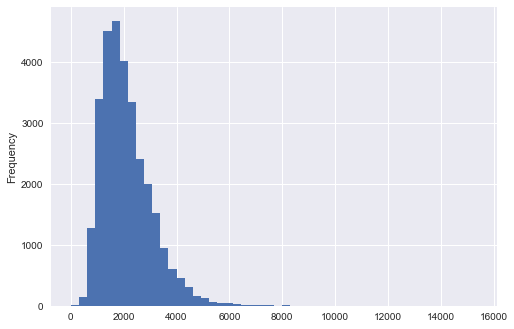

In [95]:
df['sqft_living'].plot(kind = 'hist', bins = 50)

In [96]:
print(df['sqft_living'].quantile(0.99))

5160.0


In [97]:
df = df[df['sqft_living'] < 5020]
df = df[df['sqft_living'] > 3]

In [98]:
print(df['sqft_lot'].sort_values(ascending = False))

12431    3253932
13667    3067495
12180    2657160
18946    1951712
10916    1576001
          ...   
1798         468
3070         435
12400        420
8788         412
16934        402
Name: sqft_lot, Length: 29755, dtype: int64


<AxesSubplot:ylabel='Frequency'>

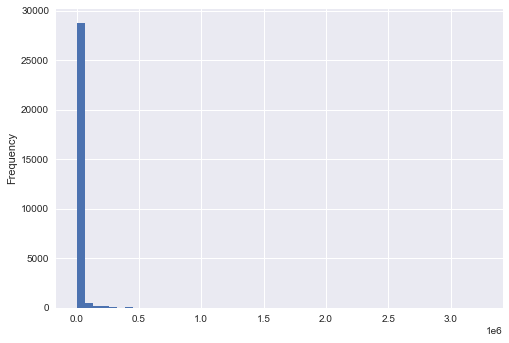

In [99]:
df['sqft_lot'].plot(kind = 'hist', bins = 50)

In [100]:
print(df['sqft_lot'].quantile(0.99))

217800.0


<AxesSubplot:ylabel='Frequency'>

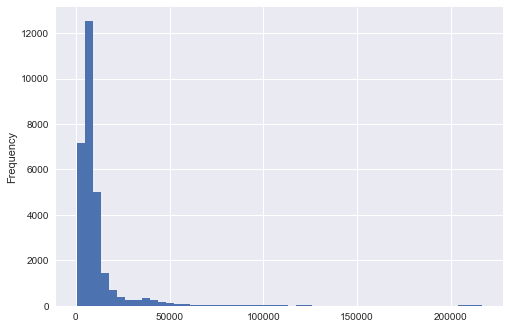

In [101]:
df = df[df['sqft_lot'] < 216802]
df['sqft_lot'].plot(kind = 'hist', bins = 50)

In [102]:
print(df['bedrooms'].sort_values(ascending = False))

9884     11
24101    10
12524     9
9455      9
7766      9
         ..
16521     0
17536     0
5811      0
1952      0
28508     0
Name: bedrooms, Length: 29445, dtype: int64


<AxesSubplot:ylabel='Frequency'>

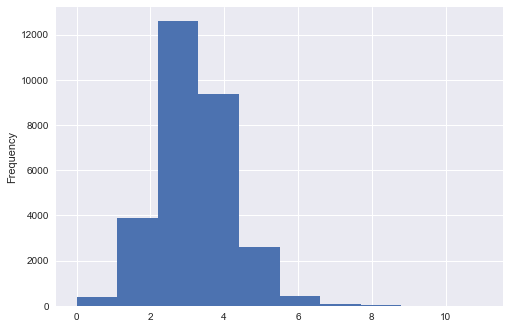

In [103]:
df['bedrooms'].plot(kind = 'hist', bins = 10)

In [104]:
print(df['bathrooms'].sort_values(ascending = False))

399      7.5
21623    7.5
657      7.5
7950     7.5
1949     7.0
        ... 
28508    0.0
23914    0.0
1289     0.0
20643    0.0
29732    0.0
Name: bathrooms, Length: 29445, dtype: float64


<AxesSubplot:ylabel='Frequency'>

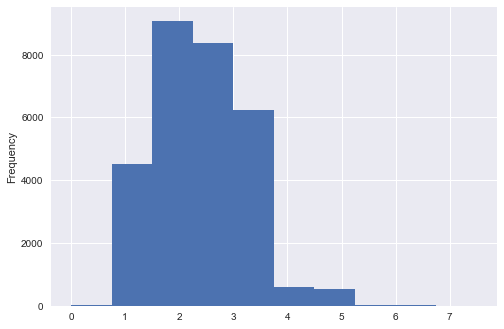

In [105]:
df['bathrooms'].plot(kind = 'hist', bins = 10)

In [107]:
df['condition'] = df['condition'].replace({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5})
df['condition']

0        4
1        3
2        3
3        3
4        3
        ..
30150    4
30151    3
30152    3
30153    3
30154    3
Name: condition, Length: 29445, dtype: int64

In [121]:
print(df['sqft_basement'].sort_values(ascending = False))

23784    3660
3158     3560
16044    3180
10258    3000
17080    2990
         ... 
16955       0
16958       0
16961       0
16962       0
0           0
Name: sqft_basement, Length: 29445, dtype: int64


<AxesSubplot:ylabel='Frequency'>

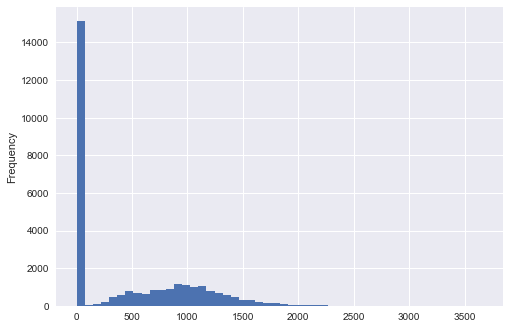

In [118]:
df['sqft_basement'].plot(kind = 'hist', bins = 50)

In [126]:
print(df['sqft_basement'].quantile(0.99))

1830.0


In [127]:
df = df[df['sqft_basement'] < 1830]

In [120]:
print(df['sqft_patio'].sort_values(ascending = False))

1980     3550
17193    2880
9170     2350
11072    2210
27069    2180
         ... 
15893       0
5107        0
15888       0
15887       0
30154       0
Name: sqft_patio, Length: 29445, dtype: int64


<AxesSubplot:ylabel='Frequency'>

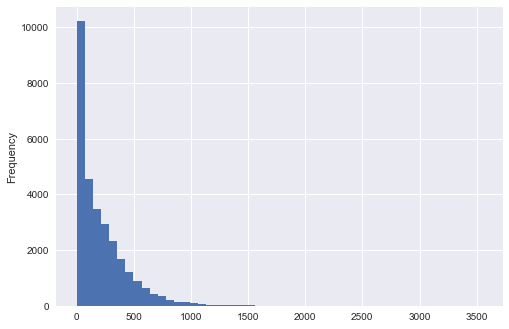

In [119]:
df['sqft_patio'].plot(kind = 'hist', bins = 50)

In [122]:
print(df['sqft_patio'].quantile(0.99))

1000.0


In [123]:
df = df[df['sqft_patio'] < 1000]

In [129]:
print(df['sqft_garage'].sort_values(ascending = False))

7468     2570
21965    2530
20404    2240
5516     2210
6385     2127
         ... 
15144       0
15137       0
15132       0
15130       0
0           0
Name: sqft_garage, Length: 28831, dtype: int64


<AxesSubplot:ylabel='Frequency'>

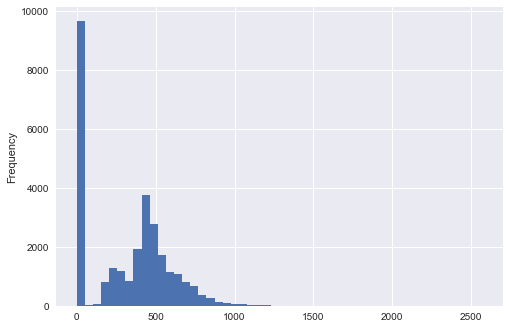

In [131]:
df['sqft_garage'].plot(kind = 'hist', bins = 50)

In [133]:
print(df['sqft_garage'].quantile(0.99))

950.0


In [134]:
df = df[df['sqft_garage'] < 950]

In [ ]:
# Create age feature
df['age'] = 2021 - df['yr_built']

## Exploration

In [135]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age
id,1.000000,-0.022641,0.000479,0.006613,0.002526,-0.139318,0.037971,-0.012515,0.007368,-0.007864,0.020365,-0.021959,0.030178,-0.028073,0.001742,-0.001940,-0.030178
price,-0.022641,1.000000,0.270690,0.414559,0.537918,0.084497,0.193278,0.007307,0.473944,0.158768,0.198232,0.237712,0.075129,0.080850,0.063626,-0.015765,-0.075129
bedrooms,0.000479,0.270690,1.000000,0.571544,0.658332,0.025083,0.141831,0.036236,0.550718,0.196020,0.313914,0.152343,0.141176,0.009543,0.110165,-0.108753,-0.141176
bathrooms,0.006613,0.414559,0.571544,1.000000,0.742128,0.013469,0.421235,-0.063920,0.631708,0.183179,0.428300,0.279180,0.459332,0.035284,-0.016672,0.026704,-0.459332
sqft_living,0.002526,0.537918,0.658332,0.742128,1.000000,0.125836,0.323721,-0.052624,0.870766,0.235844,0.474328,0.317589,0.300960,0.036829,0.106663,-0.092783,-0.300960
sqft_lot,-0.139318,0.084497,0.025083,0.013469,0.125836,1.000000,-0.111099,0.056176,0.137006,-0.018193,0.094116,0.155660,-0.043757,0.022528,0.067165,-0.073615,0.043757
floors,0.037971,0.193278,0.141831,0.421235,0.323721,-0.111099,1.000000,-0.286754,0.465072,-0.271347,0.126277,0.138874,0.553246,-0.024972,-0.224578,0.239410,-0.553246
condition,-0.012515,0.007307,0.036236,-0.063920,-0.052624,0.056176,-0.286754,1.000000,-0.140130,0.104043,-0.062263,0.046806,-0.319046,-0.078196,0.096781,-0.107248,0.319046
sqft_above,0.007368,0.473944,0.550718,0.631708,0.870766,0.137006,0.465072,-0.140130,1.000000,-0.192079,0.528104,0.230605,0.400008,0.008301,0.093481,-0.085704,-0.400008
sqft_basement,-0.007864,0.158768,0.196020,0.183179,0.235844,-0.018193,-0.271347,0.104043,-0.192079,1.000000,-0.055969,0.156684,-0.276813,0.050199,0.057753,-0.042575,0.276813


In [109]:
dfreno = df[df['yr_renovated'] > 0]
dfreno.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,1.325000e+03,1.325000e+03,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
mean,4.189851e+09,1.375297e+06,3.456604,2.459623,2220.123774,14186.541887,1.471698,3.218113,1805.415094,599.349434,198.095094,273.633208,1939.781887,1998.342642,47.571853,-122.254766
std,2.811222e+09,1.164524e+06,1.116599,0.963491,911.919248,24758.937485,0.505027,0.522865,749.383880,584.719860,272.812641,272.771232,22.974963,17.947398,0.125678,0.144026
min,1.600034e+07,3.847800e+04,0.000000,1.000000,320.000000,693.000000,1.000000,1.000000,300.000000,0.000000,0.000000,0.000000,1900.000000,1924.000000,47.175605,-122.525810
25%,1.796000e+09,7.300000e+05,3.000000,2.000000,1540.000000,5068.000000,1.000000,3.000000,1250.000000,0.000000,0.000000,70.000000,1920.000000,1988.000000,47.500360,-122.352960
50%,3.523089e+09,1.089000e+06,3.000000,2.500000,2080.000000,7800.000000,1.500000,3.000000,1680.000000,600.000000,0.000000,210.000000,1942.000000,2002.000000,47.589690,-122.290215
75%,6.648701e+09,1.665000e+06,4.000000,3.000000,2800.000000,11648.000000,2.000000,3.000000,2220.000000,1050.000000,420.000000,400.000000,1957.000000,2013.000000,47.671285,-122.199125
max,9.842300e+09,2.350000e+07,9.000000,7.500000,4980.000000,215622.000000,3.000000,5.000000,4820.000000,2550.000000,1740.000000,2100.000000,2005.000000,2022.000000,47.776925,-121.321100


In [110]:
dfnoreno = df[df['yr_renovated'] == 0]
dfnoreno.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.812000e+04,2.812000e+04,28120.000000,28120.000000,28120.000000,28120.000000,28120.000000,28120.000000,28120.000000,28120.000000,28120.000000,28120.000000,28120.000000,28120.0,28120.000000,28120.000000
mean,4.593033e+09,1.049770e+06,3.395946,2.295359,2051.325711,11821.720235,1.541767,3.487731,1764.933286,457.947902,329.067212,205.958286,1976.514758,0.0,47.312289,-121.258079
std,2.883354e+09,7.282248e+05,0.956680,0.827532,853.853017,20570.777605,0.571023,0.708520,798.525567,551.409380,273.801409,226.714442,31.478505,0.0,1.481155,5.913112
min,1.000055e+06,2.736000e+04,0.000000,0.000000,260.000000,402.000000,1.000000,1.000000,260.000000,0.000000,0.000000,0.000000,1900.000000,0.0,21.274240,-157.791480
25%,2.130701e+09,6.400000e+05,3.000000,2.000000,1400.000000,4800.000000,1.000000,3.000000,1170.000000,0.000000,0.000000,40.000000,1955.000000,0.0,47.398373,-122.325881
50%,3.904100e+09,8.500000e+05,3.000000,2.500000,1895.500000,7350.000000,1.500000,3.000000,1540.000000,0.000000,400.000000,140.000000,1978.000000,0.0,47.548857,-122.225170
75%,7.321900e+09,1.260000e+06,4.000000,2.500000,2560.000000,10200.000000,2.000000,4.000000,2230.000000,920.000000,510.000000,300.000000,2004.000000,0.0,47.670460,-122.116544
max,9.904000e+09,3.075000e+07,11.000000,7.500000,5010.000000,216790.000000,4.000000,5.000000,5500.000000,3660.000000,3580.000000,3550.000000,2022.000000,0.0,64.824070,-70.074340


In [112]:
dfold = df[df['age'] > 49]
dfold

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,age
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520,53
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910,72
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200,66
5,2807100156,7/20/2021,625000.0,2,1.0,1190,5688,1.0,NO,NO,...,1190,0,300,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155,74
6,5122400111,11/17/2021,1317227.0,3,3.0,2080,27574,1.0,NO,NO,...,2080,0,0,150,1951,0,"2633 Southwest 164th Place, Burien, Washington...",47.455470,-122.367220,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30140,8081900170,3/29/2022,2650000.0,4,3.5,3270,9200,2.0,NO,NO,...,2410,1060,0,40,1925,0,"3303 Northwest 72nd Street, Seattle, Washingto...",47.680710,-122.400025,97
30143,3277800805,9/17/2021,725000.0,3,1.0,1680,3249,1.5,NO,NO,...,1380,880,240,0,1929,0,"6324 34th Avenue Southwest, Seattle, Washingto...",47.545935,-122.374800,93
30146,3915500105,12/3/2021,380000.0,3,1.0,860,7805,1.0,NO,NO,...,860,0,0,0,1947,0,"407 M Street Southeast, Auburn, Washington 980...",47.304110,-122.213920,75
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.329400,101


In [140]:
formula = "price ~ sqft_basement"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     737.6
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.22e-160
Time:                        19:43:39   Log-Likelihood:            -4.2405e+05
No. Observations:               28525   AIC:                         8.481e+05
Df Residuals:                   28523   BIC:                         8.481e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.436e+05   5364.974    175.881      0.000    9.33e+05    9.54e+05
sqft_basement   211.8695      7.801     27.158      0.000     196.579     227.160
==============================================================================
Omnibus:                    35520.716   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26495198.025
Skew:                           6.192   Prob(JB):                         0.00
Kurtosis:                     151.791   Cond. No.                         901.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""